In [1]:
import pandas as pd
import glob

In [2]:
df_temp_1920 = pd.read_csv("./data/날씨데이터/SURFACE_ASOS_108_DAY_2019_2019_2020.csv", encoding="cp949")

In [3]:
df_temp_1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   365 non-null    int64  
 1   일시                   365 non-null    object 
 2   평균기온(°C)             365 non-null    float64
 3   최저기온(°C)             365 non-null    float64
 4   최저기온 시각(hhmi)        365 non-null    int64  
 5   최고기온(°C)             365 non-null    float64
 6   최고기온 시각(hhmi)        365 non-null    int64  
 7   강수 계속시간(hr)          139 non-null    float64
 8   10분 최다 강수량(mm)       88 non-null     float64
 9   10분 최다강수량 시각(hhmi)   56 non-null     float64
 10  1시간 최다강수량(mm)        88 non-null     float64
 11  1시간 최다 강수량 시각(hhmi)  58 non-null     float64
 12  일강수량(mm)             139 non-null    float64
 13  최대 순간 풍속(m/s)        365 non-null    float64
 14  최대 순간 풍속 풍향(16방위)    365 non-null    int64  
 15  최대 순간풍속 시각(hhmi)     365 non-null    int

In [4]:
# 1년 365일 기준 data
# 결측치 컬럼 
df_temp_1920_missing_value = df_temp_1920.columns[df_temp_1920.isnull().any()].tolist()
print(df_temp_1920_missing_value)

['강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)', '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '9-9강수(mm)', '안개 계속시간(hr)']


In [5]:
# 결측치 처리 0으로? > 미세먼지 농도 데이터 연관분석 후 진행

In [27]:
# 데이터 합치고 인코딩 문제 발생

# 날씨 데이터 전체 불러오기
# file_path = './data/날씨데이터/*.csv'

# 해당 csv파일 불러오기
# csv_files = glob.glob(file_path)

# temp_list_df = [pd.read_csv(file, encoding='cp949') for file in csv_files]

# 하나로 합치기
# temp_df = pd.concat(temp_list_df, ignore_index=True)

In [28]:
# file_path_csv = './data/날씨데이터/temp_df.csv'
# temp_df.to_csv(file_path_csv, index=False, encoding='utf-8-sig')

In [56]:
# temp_df : 2019 ~ 2023년의 모든 날씨데이터를 합친 데이터 
temp_df = pd.read_csv('./data/날씨데이터/temp_df.csv', encoding='utf-8') 

In [30]:
temp_df.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,108,2019-01-01,-5.0,-8.2,631.0,-0.6,1525,NaN,NaN,NaN,...,0.9,2.6,6.1,9.1,14.9,17.1,1.0,1.4,NaN,NaN
1,108,2019-01-02,-4.9,-8.8,802.0,0.2,1458,NaN,NaN,NaN,...,0.8,2.4,5.9,8.9,14.7,17.1,1.3,1.9,NaN,NaN
2,108,2019-01-03,-3.5,-8.4,726.0,3.2,1436,NaN,NaN,NaN,...,0.7,2.3,5.8,8.8,14.7,17.0,1.4,2.0,NaN,NaN
3,108,2019-01-04,-1.1,-6.2,757.0,4.1,1504,NaN,NaN,NaN,...,0.6,2.2,5.7,8.7,14.5,17.0,0.9,1.3,NaN,NaN
4,108,2019-01-05,-2.8,-5.5,2358.0,1.1,1521,NaN,NaN,NaN,...,0.7,2.2,5.5,8.6,14.5,16.9,1.4,2.0,NaN,NaN


In [31]:
# 한 csv파일당 365개의 data를 포함 5개의 csv 파일을 합쳤기에 1825개 정상으로 합친 것을 확인
temp_df.tail()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
1821,108,2023-12-27,1.5,-2.8,813.0,6.8,1549,NaN,NaN,NaN,...,0.9,3.2,7.0,10.7,16.1,18.3,1.0,1.4,NaN,NaN
1822,108,2023-12-28,1.2,-1.7,620.0,4.4,1453,NaN,NaN,NaN,...,1.0,3.1,6.8,10.5,16.1,18.2,1.1,1.6,NaN,NaN
1823,108,2023-12-29,1.3,-1.5,725.0,4.6,1438,NaN,NaN,NaN,...,1.0,3.1,6.7,10.3,16.0,18.2,0.8,1.1,0.3,NaN
1824,108,2023-12-30,0.6,-0.9,237.0,2.1,2354,16.67,NaN,NaN,...,1.0,3.0,6.5,10.2,15.9,18.1,0.2,0.3,17.5,NaN
1825,108,2023-12-31,2.1,0.6,2343.0,4.3,1550,9.83,NaN,NaN,...,1.0,3.0,6.4,10.0,15.8,18.1,0.4,0.5,0.0,1.18


In [32]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   1826 non-null   int64  
 1   일시                   1826 non-null   object 
 2   평균기온(°C)             1826 non-null   float64
 3   최저기온(°C)             1825 non-null   float64
 4   최저기온 시각(hhmi)        1825 non-null   float64
 5   최고기온(°C)             1826 non-null   float64
 6   최고기온 시각(hhmi)        1826 non-null   int64  
 7   강수 계속시간(hr)          746 non-null    float64
 8   10분 최다 강수량(mm)       486 non-null    float64
 9   10분 최다강수량 시각(hhmi)   317 non-null    float64
 10  1시간 최다강수량(mm)        486 non-null    float64
 11  1시간 최다 강수량 시각(hhmi)  332 non-null    float64
 12  일강수량(mm)             747 non-null    float64
 13  최대 순간 풍속(m/s)        1824 non-null   float64
 14  최대 순간 풍속 풍향(16방위)    1824 non-null   float64
 15  최대 순간풍속 시각(hhmi)     1824 non-null   f

In [94]:
file_path_xlsx = './data/미세먼지 농도 데이터/2019_2023_미세먼지데이터_결측값처리.xlsx'

# 엑셀 파일 불러오기
pm_df = pd.read_excel(file_path_xlsx)

# 엑셀 데이터를 CSV 파일로 저장
csv_file_path = './data/미세먼지 농도 데이터/2019_2023_미세먼지데이터_결측값처리.csv'
pm_df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

# 파일 경로 출력
csv_file_path

'./data/미세먼지 농도 데이터/2019_2023_미세먼지데이터_결측값처리.csv'

In [20]:
pm_df.head()

,지역,날짜,SO2,CO,O3,NO2,PM10,PM25
0,강남구,20190101,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333
1,강남구,20190102,0.004854,0.900000,0.009833,0.031917,33.074275,21.828804
2,강남구,20190103,0.004964,1.102652,0.004911,0.040640,38.901087,24.388258
3,강남구,20190104,0.005558,1.247283,0.004013,0.048946,61.451993,44.906703
4,강남구,20190105,0.005167,0.685417,0.012458,0.027854,63.625000,41.854167


In [21]:
pm_df.tail()

,지역,날짜,SO2,CO,O3,NO2,PM10,PM25
45645,중랑구,20231227,0.002900,0.711364,0.010323,0.044173,58.500000,46.727273
45646,중랑구,20231228,0.003017,0.805000,0.009388,0.043238,48.083333,39.458333
45647,중랑구,20231229,0.002625,0.560000,0.012875,0.033488,37.708333,30.500000
45648,중랑구,20231230,0.002263,0.541250,0.012854,0.028279,34.500000,28.833333
45649,중랑구,20231231,0.002442,0.675417,0.013029,0.031579,19.666667,15.541667


In [75]:
pm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45650 entries, 0 to 45649
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      45650 non-null  object 
 1   날짜      45650 non-null  int64  
 2   SO2     45650 non-null  float64
 3   CO      45650 non-null  float64
 4   O3      45650 non-null  float64
 5   NO2     45650 non-null  float64
 6   PM10    45650 non-null  float64
 7   PM25    45650 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.8+ MB


In [37]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   1826 non-null   int64  
 1   일시                   1826 non-null   object 
 2   평균기온(°C)             1826 non-null   float64
 3   최저기온(°C)             1825 non-null   float64
 4   최저기온 시각(hhmi)        1825 non-null   float64
 5   최고기온(°C)             1826 non-null   float64
 6   최고기온 시각(hhmi)        1826 non-null   int64  
 7   강수 계속시간(hr)          746 non-null    float64
 8   10분 최다 강수량(mm)       486 non-null    float64
 9   10분 최다강수량 시각(hhmi)   317 non-null    float64
 10  1시간 최다강수량(mm)        486 non-null    float64
 11  1시간 최다 강수량 시각(hhmi)  332 non-null    float64
 12  일강수량(mm)             747 non-null    float64
 13  최대 순간 풍속(m/s)        1824 non-null   float64
 14  최대 순간 풍속 풍향(16방위)    1824 non-null   float64
 15  최대 순간풍속 시각(hhmi)     1824 non-null   f

## 

## 날씨, 미세먼지 데이터 상관분석

### datetime 형식 변환

In [57]:
# 날짜 컬럼을 datetime 형식으로 변환
temp_df['일시'] = pd.to_datetime(temp_df['일시'])
pm_df['날짜'] = pd.to_datetime(pm_df['날짜'])

In [58]:
# 컬럼 이름 변경 (일시 -> 날짜) to match for merging
temp_df.rename(columns={'일시': '날짜'}, inplace=True)

In [63]:
# 날짜 형식 통일 (YYYY-MM-DD 형식으로 변환)
temp_df['날짜'] = temp_df['날짜'].dt.strftime('%Y-%m-%d')

In [95]:
pm_df['날짜'] = pd.to_datetime(pm_df['날짜'].astype(str), format='%Y%m%d')

In [96]:
pm_df['날짜'] = pm_df['날짜'].dt.strftime('%Y-%m-%d')

In [64]:
# 일시 컬럼이 날짜로 변경이 되었는지 확인
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   1826 non-null   int64  
 1   날짜                   1826 non-null   object 
 2   평균기온(°C)             1826 non-null   float64
 3   최저기온(°C)             1825 non-null   float64
 4   최저기온 시각(hhmi)        1825 non-null   float64
 5   최고기온(°C)             1826 non-null   float64
 6   최고기온 시각(hhmi)        1826 non-null   int64  
 7   강수 계속시간(hr)          746 non-null    float64
 8   10분 최다 강수량(mm)       486 non-null    float64
 9   10분 최다강수량 시각(hhmi)   317 non-null    float64
 10  1시간 최다강수량(mm)        486 non-null    float64
 11  1시간 최다 강수량 시각(hhmi)  332 non-null    float64
 12  일강수량(mm)             747 non-null    float64
 13  최대 순간 풍속(m/s)        1824 non-null   float64
 14  최대 순간 풍속 풍향(16방위)    1824 non-null   float64
 15  최대 순간풍속 시각(hhmi)     1824 non-null   f

In [97]:
pm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45650 entries, 0 to 45649
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      45650 non-null  object 
 1   날짜      45650 non-null  object 
 2   SO2     45650 non-null  float64
 3   CO      45650 non-null  float64
 4   O3      45650 non-null  float64
 5   NO2     45650 non-null  float64
 6   PM10    45650 non-null  float64
 7   PM25    45650 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.8+ MB


In [98]:
pm_df.tail()

,지역,날짜,SO2,CO,O3,NO2,PM10,PM25
45645,중랑구,2023-12-27,0.002900,0.711364,0.010323,0.044173,58.500000,46.727273
45646,중랑구,2023-12-28,0.003017,0.805000,0.009388,0.043238,48.083333,39.458333
45647,중랑구,2023-12-29,0.002625,0.560000,0.012875,0.033488,37.708333,30.500000
45648,중랑구,2023-12-30,0.002263,0.541250,0.012854,0.028279,34.500000,28.833333
45649,중랑구,2023-12-31,0.002442,0.675417,0.013029,0.031579,19.666667,15.541667


In [80]:
temp_df.tail()

,지점,날짜,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
1821,108,2023-12-27,1.5,-2.8,813.0,6.8,1549,NaN,NaN,NaN,...,0.9,3.2,7.0,10.7,16.1,18.3,1.0,1.4,NaN,NaN
1822,108,2023-12-28,1.2,-1.7,620.0,4.4,1453,NaN,NaN,NaN,...,1.0,3.1,6.8,10.5,16.1,18.2,1.1,1.6,NaN,NaN
1823,108,2023-12-29,1.3,-1.5,725.0,4.6,1438,NaN,NaN,NaN,...,1.0,3.1,6.7,10.3,16.0,18.2,0.8,1.1,0.3,NaN
1824,108,2023-12-30,0.6,-0.9,237.0,2.1,2354,16.67,NaN,NaN,...,1.0,3.0,6.5,10.2,15.9,18.1,0.2,0.3,17.5,NaN
1825,108,2023-12-31,2.1,0.6,2343.0,4.3,1550,9.83,NaN,NaN,...,1.0,3.0,6.4,10.0,15.8,18.1,0.4,0.5,0.0,1.18


### 미세먼지 데이터 지역구 나누기
- 미세먼지 데이터는 서울의 모든 지역구가 합쳐진 데이터이기에 날씨와 미세먼지 데이터의 크기가 맞지 않고 날짜컬럼만 동일하기에 맞추기 위해서 해당 작업을 진행해야 한다.

In [99]:
pm_gu_list = pm_df['지역'].unique()
print(pm_gu_list)

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']


In [101]:
# 지역별로 데이터프레임 나눠서 저장
region_dataframes_dict = {region: pm_df[pm_df['지역'] == region].reset_index(drop=True) for region in pm_gu_list}

In [104]:
# 강남구 미세먼지 데이터프레임 출력

gangnam_pm_df = region_dataframes_dict["강남구"]

In [105]:
gangnam_pm_df

,지역,날짜,SO2,CO,O3,NO2,PM10,PM25
0,강남구,2019-01-01,0.004437,0.841667,0.013542,0.025854,36.416667,25.708333
1,강남구,2019-01-02,0.004854,0.900000,0.009833,0.031917,33.074275,21.828804
2,강남구,2019-01-03,0.004964,1.102652,0.004911,0.040640,38.901087,24.388258
3,강남구,2019-01-04,0.005558,1.247283,0.004013,0.048946,61.451993,44.906703
4,강남구,2019-01-05,0.005167,0.685417,0.012458,0.027854,63.625000,41.854167
...,...,...,...,...,...,...,...,...
1821,강남구,2023-12-27,0.003669,0.953958,0.004660,0.050063,75.979167,57.291667
1822,강남구,2023-12-28,0.003502,0.786042,0.008579,0.039581,49.916667,39.458333
1823,강남구,2023-12-29,0.003294,0.687292,0.009190,0.035690,46.437500,35.145833
1824,강남구,2023-12-30,0.002913,0.687917,0.005481,0.034212,45.500000,36.541667


In [106]:
# 중랑구 미세먼지 데이터프레임 출력

jungnang_pm_df = region_dataframes_dict["중랑구"]
jungnang_pm_df

,지역,날짜,SO2,CO,O3,NO2,PM10,PM25
0,중랑구,2019-01-01,0.006583,0.662500,0.013583,0.030208,33.625000,24.916667
1,중랑구,2019-01-02,0.006833,0.645833,0.010375,0.033458,29.083333,21.875000
2,중랑구,2019-01-03,0.007375,0.708333,0.005667,0.041375,35.958333,24.708333
3,중랑구,2019-01-04,0.007682,0.950000,0.002500,0.052818,50.818182,37.545455
4,중랑구,2019-01-05,0.007083,0.704167,0.016250,0.027250,61.458333,43.625000
...,...,...,...,...,...,...,...,...
1821,중랑구,2023-12-27,0.002900,0.711364,0.010323,0.044173,58.500000,46.727273
1822,중랑구,2023-12-28,0.003017,0.805000,0.009388,0.043238,48.083333,39.458333
1823,중랑구,2023-12-29,0.002625,0.560000,0.012875,0.033488,37.708333,30.500000
1824,중랑구,2023-12-30,0.002263,0.541250,0.012854,0.028279,34.500000,28.833333


In [107]:
merged_df = pd.merge(temp_df, gangnam_pm_df, on='날짜')

In [110]:
merged_df.tail()

,지점,날짜,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr),지역,SO2,CO,O3,NO2,PM10,PM25
1821,108,2023-12-27,1.5,-2.8,813.0,6.8,1549,NaN,NaN,NaN,...,1.4,NaN,NaN,강남구,0.003669,0.953958,0.004660,0.050063,75.979167,57.291667
1822,108,2023-12-28,1.2,-1.7,620.0,4.4,1453,NaN,NaN,NaN,...,1.6,NaN,NaN,강남구,0.003502,0.786042,0.008579,0.039581,49.916667,39.458333
1823,108,2023-12-29,1.3,-1.5,725.0,4.6,1438,NaN,NaN,NaN,...,1.1,0.3,NaN,강남구,0.003294,0.687292,0.009190,0.035690,46.437500,35.145833
1824,108,2023-12-30,0.6,-0.9,237.0,2.1,2354,16.67,NaN,NaN,...,0.3,17.5,NaN,강남구,0.002913,0.687917,0.005481,0.034212,45.500000,36.541667
1825,108,2023-12-31,2.1,0.6,2343.0,4.3,1550,9.83,NaN,NaN,...,0.5,0.0,1.18,강남구,0.002867,0.706458,0.014267,0.025254,25.262681,20.395833


In [111]:
# 상관분석을 위해 숫자형 데이터만 추출
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

In [126]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False

In [112]:
# 상관분석 진행
correlation_matrix = numeric_df.corr()

c:\Users\vkdi1\anaconda3\envs\zb\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


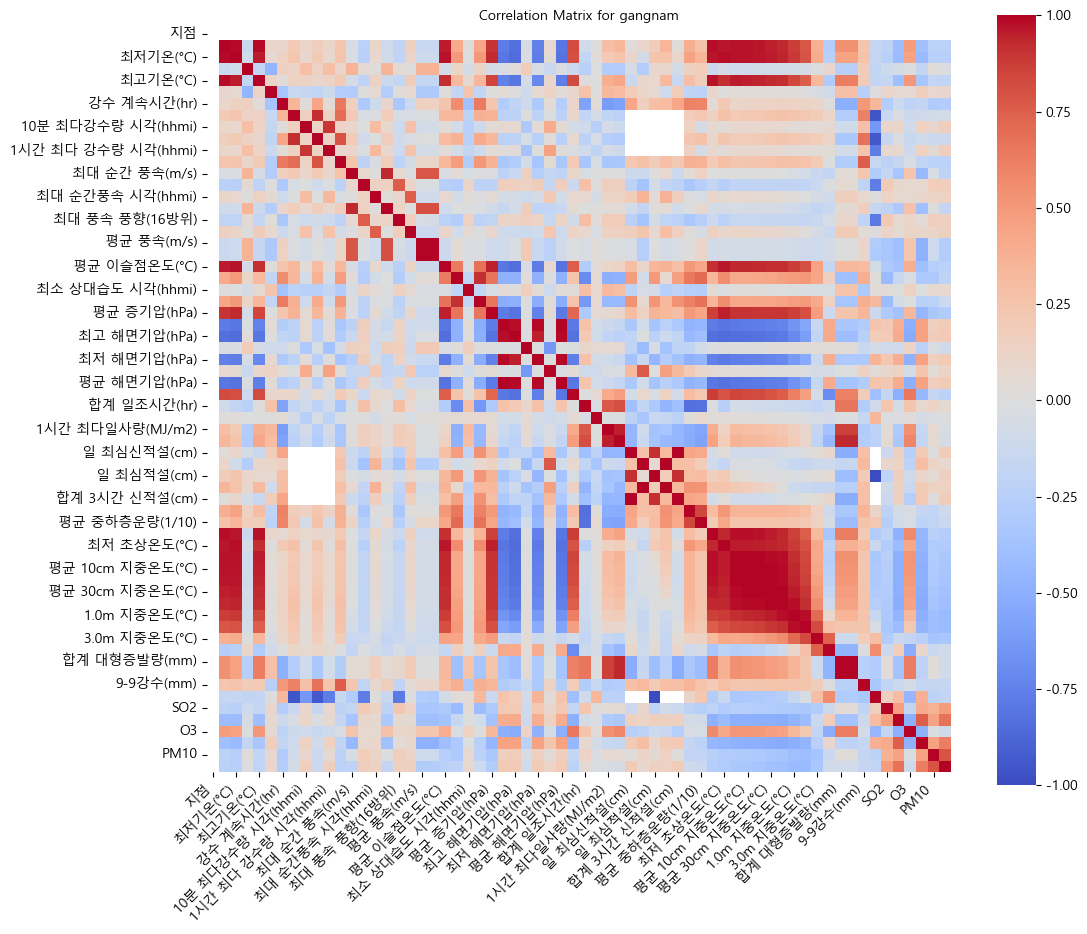

In [127]:
# 상관행렬 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, annot_kws={"size": 10})
plt.title(f'Correlation Matrix for gangnam', fontproperties=fontprop)
plt.xticks(fontproperties=fontprop, rotation=45, ha='right')
plt.yticks(fontproperties=fontprop)
plt.show()

In [135]:
# 미세먼지 농도 관련 컬럼 (PM10, PM2.5)와 상관관계가 높은 컬럼 찾기
threshold = 0.3 # 상관계수 0.3이상만
correlation_with_pm10 = correlation_matrix['PM10'].drop('PM10', errors='ignore')
correlation_with_pm25 = correlation_matrix['PM25'].drop('PM25', errors='ignore')

In [136]:
relevant_columns_pm10 = correlation_with_pm10[abs(correlation_with_pm10) > threshold].index.tolist()
relevant_columns_pm25 = correlation_with_pm25[abs(correlation_with_pm25) > threshold].index.tolist()

In [137]:
# 중복 제거 후 최종 컬럼 리스트
final_relevant_columns = list(set(relevant_columns_pm10 + relevant_columns_pm25))

In [138]:
 # merged_df에서 실제 존재하는 관련된 컬럼만 남기기
existing_columns = [col for col in final_relevant_columns if col in merged_df.columns]
if '날짜' not in existing_columns:
    existing_columns.append('날짜')

In [139]:
temp_df_filtered = merged_df[existing_columns]

In [142]:
# 필터링된 데이터프레임을 CSV로 저장
filtered_file_path = f'filtered_temp_df_gangnam.csv'
temp_df_filtered.to_csv(filtered_file_path, index=False, encoding='utf-8-sig')

In [143]:
# 파일 경로 출력
print(f"Filtered CSV file for gangnam saved at: {filtered_file_path}")

Filtered CSV file for gangnam saved at: filtered_temp_df_gangnam.csv
